In [155]:
from math import isnan
from functools import total_ordering
import calendar
import zipfile
import os
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from datetime import datetime
import datetime

In [26]:
df = pd.read_csv('MSFT.csv', sep=",").filter(['UnderlyingPrice', 'Type', 'Expiration',
                   'DataDate', 'Strike', 'Last', 'Bid', 'Ask', 'Volume', 'OpenInterest', 'IV', 'Delta', 'Gamma',
                   'Theta', 'Vega'])

In [28]:
df['Expiration'] = pd.to_datetime(df['Expiration'])
df['DataDate'] = pd.to_datetime(df['DataDate'])

In [29]:
df2 = df.drop_duplicates(subset='DataDate', keep='first').filter(['DataDate', 'UnderlyingPrice'])

In [30]:
df2 = df2.set_index('DataDate')

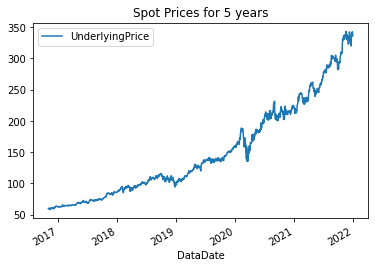

In [31]:
df2.plot()
plt.title('Spot Prices for 5 years')
plt.show()

In [32]:
dfCall = df.loc[df['Type'] == "call"]

In [ ]:
def calculate_mean_greeks(df, max_days):
    greeks = {}
    for i in range(1, max_days + 1):
        frame = df2[df2.index.isin([i], level='Days')]
        delta = frame.Delta.mean()
        gamma = frame.Gamma.mean()
        theta = frame.Theta.mean()
        vega = frame.Vega.mean()
        if isnan(delta):
            continue
        greeks[i] = [delta, gamma, theta, vega]
    return pd.DataFrame.from_dict(greeks, orient='index', columns=['Delta', 'Gamma', 'Theta', 'Vega'])



def create_analysis(df):
    df['Days'] = (df['Expiration'] - df['DataDate']).astype('timedelta64[D]').astype(int)
    df2 = df.groupby('DataDate').apply(lambda x: x.groupby('Days').apply(lambda g: g.iloc[(g['Delta'] - 0.5).abs().argsort()[:1]]))
    max_days = df2.loc[df2['Days'].idxmax()]['Days']
    print(f'Max days option expiration is {max_days}')
    dfGreeks = calculate_mean_greeks(df2, max_days)



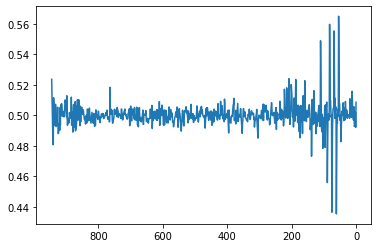

In [147]:
plt.gca().invert_xaxis()
plt.plot(dfGreeks['Delta'])
plt.show()

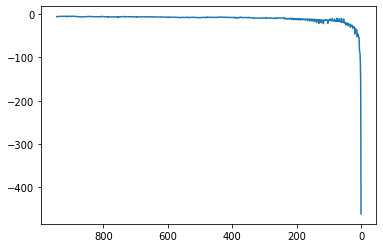

In [149]:
plt.gca().invert_xaxis()
plt.plot(dfGreeks['Theta'])
plt.show()

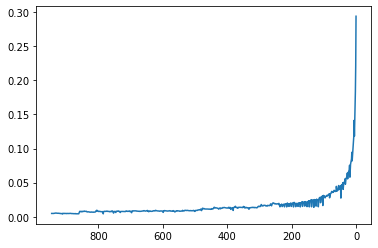

In [150]:
plt.gca().invert_xaxis()
plt.plot(dfGreeks['Gamma'])
plt.show()

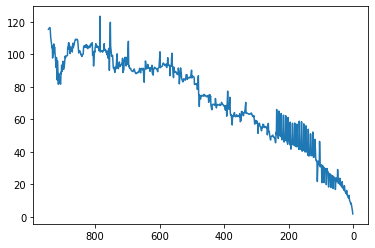

In [151]:
plt.gca().invert_xaxis()
plt.plot(dfGreeks['Vega'])
plt.show()

In [152]:
df2

UnderlyingPrice Expiration   DataDate  Strike   Last  \
DataDate   Days                                                                 
2016-11-01 3    42                 59.80 2016-11-04 2016-11-01    60.0   0.37   
           10   124                59.80 2016-11-11 2016-11-01    60.0   0.81   
           17   224                59.80 2016-11-18 2016-11-01    59.5   0.95   
           24   308                59.80 2016-11-25 2016-11-01    59.5   1.53   
           31   380                59.80 2016-12-02 2016-11-01    59.5   1.15   
...                                  ...        ...        ...     ...    ...   
2021-12-31 259  1714422           336.32 2022-09-16 2021-12-31   345.0  27.20   
           385  1714574           336.32 2023-01-20 2021-12-31   350.0  32.75   
           441  1714724           336.32 2023-03-17 2021-12-31   355.0  30.00   
           532  1714870           336.32 2023-06-16 2021-12-31   355.0  38.40   
           749  1715008           336.32 2024-01-19 2021-12-31   365.0  47.70   

                           Bid    Ask  Volume  OpenInterest      IV   Delta  \
DataDate   Days                                                               
2016-11-01 3    42        0.31   0.37    8134          4904  0.2256  0.4314   
           10   124       0.76   0.84     878          1959  0.2329  0.4742   
           17   224       1.12   1.16     453           339  0.2137  0.5265   
           24   308       1.17   1.23       0           616  0.1932  0.5185   
           31   380       1.28   1.35       4            39  0.1880  0.5154   
...                        ...    ...     ...           ...     ...     ...   
2021-12-31 259  1714422  26.25  29.00      57           755  0.2785  0.5034   
           385  1714574  30.25  34.00     181          4765  0.2756  0.5003   
           441  1714724  31.05  35.00       0          1095  0.2755  0.4911   
           532  1714870  36.55  39.75       5          1498  0.2821  0.5067   
           749  1715008  41.00  45.50       0           274  0.2827  0.5027   

                          Gamma    Theta      Vega  Days  
DataDate   Days                                           
2016-11-01 3    42       0.3644 -33.3893    1.8792     3  
           10   124      0.1788 -17.5871    3.8069    10  
           17   224      0.1467  -9.9672    5.0176    17  
           24   308      0.1358  -7.2651    5.9981    24  
           31   380      0.1224  -6.2155    6.8375    31  
...                         ...      ...       ...   ...  
2021-12-31 259  1714422  0.0051 -22.2149  112.7978   259  
           385  1714574  0.0042 -18.0305  137.5554   385  
           441  1714724  0.0039 -16.9910  147.3328   441  
           532  1714870  0.0035 -15.8515  161.8596   532  
           749  1715008  0.0029 -13.4048  192.1119   749  

[21442 rows x 15 columns]

In [162]:
 df2['Weekday'] = df2['DataDate'].dt.day_name()

In [ ]:
df2